In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [600]:
geno_df = pd.read_csv('/kaggle/input/outdata/matrix_of_genotypes.csv')
df = pd.read_csv('/kaggle/input/outdata/phenotypes.csv')

In [601]:
geno_df.T.head(10)

,0,1,2,3,4,5
rsid,rs16891982,rs12203592,rs1393350,rs12896399,rs1800407,rs12913832
chromosome,5,6,11,14,15,15
position,33951693,396321,89011046,92773663,28230318,28365618
user10012,CG,CC,GG,GT,CC,AA
user10074,GG,CT,GG,GG,CC,GG
user10077,GG,CT,GG,GT,CC,GG
user10080,GG,CT,AG,TT,CC,GG
user1010,CG,CC,GG,GG,CC,AG
user10123,GG,CC,GG,GG,CC,GG
user1013,GG,CT,GG,TT,CT,AG


## Посмотрим какие есть уникальные цвета глаз

In [602]:
df['eye_colour'].unique()

array(['Dark brown', 'Brown-green', 'Green-gray', 'Green', 'Brown',
       'Hazel', 'Blue', 'Hazel (brown/green)',
       'Blue, grey, green, changing', 'Blue-green', 'Hazel/light brown',
       'Rs12913832 aa', 'Blue-green-grey', 'Green-hazel', 'Mixed',
       'Blue-grey', 'Blue-grey with central heterochromia', 'Gray-blue',
       'Black', 'Blue-grey; broken amber collarette',
       'Rs12913832 ag (they', 'Gg', 'Brown-amber', 'Brown/black',
       'Rs12913832 gg', 'Green-brown', 'Light-mixed green', 'Dark blue',
       'Indeterminate brown-green with a subtle grey caste', 'Grey brown',
       'Olive-Brown ringing Burnt Umber-Brown', 'Blue with yellow parts',
       'Ambar-Green', 'Brown-(green when external temperature rises)',
       'Ambar-green', 'Olive-brown ringing burnt umber-brown',
       'Blue grey', 'Brown - Brown and green in bright sunlight',
       'Brown - brown and green in bright sunlight', 'Light blue-green',
       'Split - one side dark blue / other side light blu

## очевидно их много слишком. Оставим 4 варианта: голубые, карии, зеленые и ореховые

In [603]:
df['eye_colour'] = df['eye_colour'].replace('Dark brown', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Brown-green', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Green-gray', 'green')
df['eye_colour'] = df['eye_colour'].replace('Green', 'green')
df['eye_colour'] = df['eye_colour'].replace('Brown', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Hazel', 'hazel')

df['eye_colour'] = df['eye_colour'].replace('Blue', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Hazel (brown/green)', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Blue, grey, green, changing', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Blue-green', 'blue')

df['eye_colour'] = df['eye_colour'].replace('Hazel/light brown', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Hazel (brown/green)', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Blue-green-grey', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Green-hazel', 'green')

df['eye_colour'] = df['eye_colour'].replace('Mixed', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Blue-grey', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Blue-grey with central heterochromia', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Gray-blue', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Black', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Blue-grey; broken amber collarette', 'blue')
 
df['eye_colour'] = df['eye_colour'].replace('Brown-amber', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Brown/black', 'brown') 

df['eye_colour'] = df['eye_colour'].replace('Green-brown', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Light-mixed green', 'green')
df['eye_colour'] = df['eye_colour'].replace('Dark blue', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Indeterminate brown-green with a subtle grey caste', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Grey brown', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Olive-Brown ringing Burnt Umber-Brown', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Blue with yellow parts', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Ambar-Green', 'green')
df['eye_colour'] = df['eye_colour'].replace('Brown-(green when external temperature rises)', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Ambar-green', 'green')
df['eye_colour'] = df['eye_colour'].replace('Olive-brown ringing burnt umber-brown', 'brown')

df['eye_colour'] = df['eye_colour'].replace('Blue grey', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Brown - Brown and green in bright sunlight', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Brown - brown and green in bright sunlight', 'brown')
df['eye_colour'] = df['eye_colour'].replace('Light blue-green', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Split - one side dark blue / other side light blue and green', 'blue')
df['eye_colour'] = df['eye_colour'].replace('blue-brown heterochromia', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Dark Grayish-Blue Eyes (like a stone)', 'blue')

df['eye_colour'] = df['eye_colour'].replace('Blue with a yellow ring of flecks that make my eyes look green depending on the light or my  mood', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Hazel (light brown, dark green, dark blue)', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Blue-green; amber collarette, and gray-blue ringing', 'blue')
df['eye_colour'] = df['eye_colour'].replace('Hazel/Yellow', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('green-blue outer ring and brown flecks around iris', 'hazel')
df['eye_colour'] = df['eye_colour'].replace('Amber - (yellow/ocre  brown)', 'brown') 
 

In [604]:
df['eye_colour'].unique() # в выборке присутствуют какие то ошибочные данные, удалим их

array(['brown', 'hazel', 'green', 'blue', 'Rs12913832 aa',
       'Rs12913832 ag (they', 'Gg', 'Rs12913832 gg'], dtype=object)

In [605]:
id_to_drop = [] # надо запомнить какие айди мы удаляли,что бы удалить эти же строки из таблицы по генотипам
id_to_drop.append(df[df['eye_colour'] == 'Gg']['user_id'].to_list())
id_to_drop.append(df[df['eye_colour'] == 'Rs12913832 aa']['user_id'].to_list())
id_to_drop.append(df[df['eye_colour'] == 'Rs12913832 gg']['user_id'].to_list())
id_to_drop.append(df[df['eye_colour'] == 'Rs12913832 ag (they']['user_id'].to_list())

In [606]:
import itertools

id_to_drop = list(itertools.chain.from_iterable(id_to_drop))
id_to_drop = list(set(id_to_drop))
print(id_to_drop) # сохраняем айдишники

['user1029', 'user1089', 'user2293', 'user11153', 'user2533', 'user10770', 'user4038', 'user1139', 'user2663']


In [607]:
## удаляем эти же наблюдения из таблицы генотипов
df = df[df['eye_colour'] != 'Gg']
df = df[df['eye_colour'] != 'Rs12913832 aa']
df = df[df['eye_colour'] != 'Rs12913832 gg']
df = df[df['eye_colour'] != 'Rs12913832 ag (they']

In [608]:
df['eye_colour'].unique()

array(['brown', 'hazel', 'green', 'blue'], dtype=object)

In [609]:
df['eye_colour'].value_counts() ##  зеленых меньше всех, видимо и скор будет хуже всех

eye_colour
blue     287
brown    260
hazel    164
green     85
Name: count, dtype: int64

In [610]:
list_of_cols = geno_df.columns.to_list()

for id in id_to_drop:
    if id in list_of_cols:
        geno_df.drop(id, axis=1, inplace=True)
        print(f"User id {id} REPLACED from the data frame!")
    else:
        print(f"User id {id} is not found in the data frame!")

User id user1029 REPLACED from the data frame!
User id user1089 REPLACED from the data frame!
User id user2293 REPLACED from the data frame!
User id user11153 REPLACED from the data frame!
User id user2533 REPLACED from the data frame!
User id user10770 REPLACED from the data frame!
User id user4038 REPLACED from the data frame!
User id user1139 REPLACED from the data frame!
User id user2663 REPLACED from the data frame!


In [611]:
geno_df.drop('chromosome', axis=1, inplace=True) ## эти колонки вообще нам не нужны
geno_df.drop('rsid', axis=1, inplace=True)
geno_df.drop('position', axis=1, inplace=True)
geno_df

,user10012,user10074,user10077,user10080,user1010,user10123,user1013,user10141,user10142,user10171,...,user9803,user9812,user9839,user9869,user9871,user9876,user9892,user9920,user9928,user9969
0,CG,GG,GG,GG,CG,GG,GG,GG,GG,CG,...,GG,CG,GG,GG,GG,GG,GG,GG,GG,GG
1,CC,CT,CT,CT,CC,CC,CT,CC,CC,CC,...,CC,CC,CC,CC,CC,TT,CT,CC,TT,CC
2,GG,GG,GG,AG,GG,GG,GG,AG,GG,GG,...,AG,GG,AG,GG,AG,GG,GG,GG,GG,AG
3,GT,GG,GT,TT,GG,GG,TT,GT,GT,GG,...,GT,GT,GG,GG,GG,GT,GG,GG,TT,GG
4,CC,CC,CC,CC,CC,CC,CT,CC,CC,CC,...,CT,CC,CT,CC,CC,CC,CC,CC,CC,CC
5,AA,GG,GG,GG,AG,GG,AG,GG,GG,AG,...,AG,AG,AG,AG,GG,GG,AG,GG,GG,AG


In [612]:
geno_df = geno_df.T ## транспонируем что бы наблюдения были по строкам
geno_df

,0,1,2,3,4,5
user10012,CG,CC,GG,GT,CC,AA
user10074,GG,CT,GG,GG,CC,GG
user10077,GG,CT,GG,GT,CC,GG
user10080,GG,CT,AG,TT,CC,GG
user1010,CG,CC,GG,GG,CC,AG
...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG
user9892,GG,CT,GG,GG,CC,AG
user9920,GG,CC,GG,GG,CC,GG
user9928,GG,TT,GG,TT,CC,GG


In [613]:
df.drop('id', axis=1, inplace=True) ## тоже лишнее
df

,user_id,eye_colour
0,user10012,brown
1,user10074,hazel
2,user10077,green
3,user10080,green
4,user1010,brown
...,...,...
802,user9876,blue
803,user9892,brown
804,user9920,blue
805,user9928,blue


## теперь сравним по id, соответствуют ли таблицы

In [614]:
geno_ids = geno_df.index.to_list() ## получаем айдишники из таблицы генотипов и фенотипов
pheno_ids = df['user_id'].to_list()

ids_to_delete_from_geno = []
for id in geno_ids:
    if id in pheno_ids:
        continue
    ids_to_delete_from_geno.append(id)
    
ids_to_delete_from_pheno = []
for id in pheno_ids:
    if id in geno_ids:
        continue
    ids_to_delete_from_pheno.append(id)

In [615]:
len(ids_to_delete_from_geno) # 41 id есть в таблице по генотипам и их нет в таблице фенотипов, надо удалять

41

In [616]:
ids_to_delete_from_pheno ## таблица по фенотипам не содержит лишних наблюдений

[]

In [617]:
for id in ids_to_delete_from_geno:
    geno_df.drop(id, axis=0, inplace=True) ## удаляем

In [618]:
geno_df

,0,1,2,3,4,5
user10012,CG,CC,GG,GT,CC,AA
user10074,GG,CT,GG,GG,CC,GG
user10077,GG,CT,GG,GT,CC,GG
user10080,GG,CT,AG,TT,CC,GG
user1010,CG,CC,GG,GG,CC,AG
...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG
user9892,GG,CT,GG,GG,CC,AG
user9920,GG,CC,GG,GG,CC,GG
user9928,GG,TT,GG,TT,CC,GG


In [619]:
geno_ids = geno_df.index.to_list() ## проверяем еще раз
pheno_ids = df['user_id'].to_list()

ids_to_delete_from_geno = []
for id in geno_ids:
    if id in pheno_ids:
        continue
    ids_to_delete_from_geno.append(id)
    
ids_to_delete_from_pheno = []
for id in pheno_ids:
    if id in geno_ids:
        continue
    ids_to_delete_from_pheno.append(id)

In [620]:
## тестируем на дубликаты
assert len(geno_ids) == len(set(geno_ids))
assert len(pheno_ids) == len(set(pheno_ids)) ## они есть в таблице фенотипов

AssertionError: 

In [621]:
df.drop_duplicates(subset='user_id', inplace=True) ## удаляем дубликаты 

In [622]:
assert len(geno_df.index.to_list()) == len(set(geno_df.index.to_list()))
assert len(df['user_id'].to_list()) == len(set(df['user_id'].to_list()))
## тест пройден

In [623]:
merged_df = geno_df.copy() ## копируем для объединения в одну

In [624]:
merged_df['eye'] = [str(i) for i in range(757)] ## надо создать тарген переменную, заполним пока мусором

In [625]:
merged_df

,0,1,2,3,4,5,eye
user10012,CG,CC,GG,GT,CC,AA,0
user10074,GG,CT,GG,GG,CC,GG,1
user10077,GG,CT,GG,GT,CC,GG,2
user10080,GG,CT,AG,TT,CC,GG,3
user1010,CG,CC,GG,GG,CC,AG,4
...,...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG,752
user9892,GG,CT,GG,GG,CC,AG,753
user9920,GG,CC,GG,GG,CC,GG,754
user9928,GG,TT,GG,TT,CC,GG,755


In [626]:
## заполняем таблицу по айди
for id in df['user_id'].to_list():
    merged_df.loc[id, 'eye'] = df[df['user_id'] == id].iat[0, df.columns.get_loc('eye_colour')]

In [627]:
merged_df

,0,1,2,3,4,5,eye
user10012,CG,CC,GG,GT,CC,AA,brown
user10074,GG,CT,GG,GG,CC,GG,hazel
user10077,GG,CT,GG,GT,CC,GG,green
user10080,GG,CT,AG,TT,CC,GG,green
user1010,CG,CC,GG,GG,CC,AG,brown
...,...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG,blue
user9892,GG,CT,GG,GG,CC,AG,brown
user9920,GG,CC,GG,GG,CC,GG,blue
user9928,GG,TT,GG,TT,CC,GG,blue


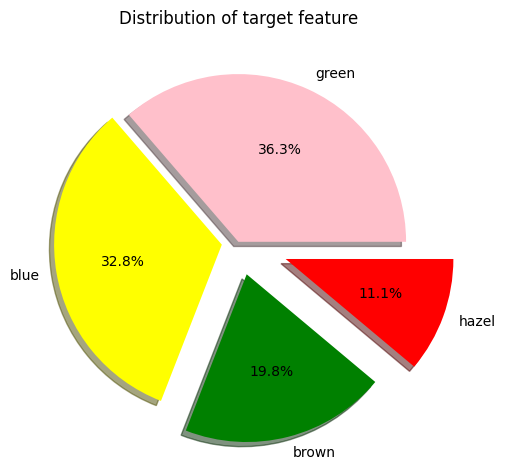

In [628]:
## посмотрим на распределение целевой переменной 
target_values = [j for j in merged_df['eye'].value_counts()]
target_labels = set(merged_df['eye'].tolist())
colors = ['pink', 'yellow', 'green', 'red']
plt.pie(target_values, labels=target_labels, autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1, 0.2, 0.3], colors=colors)
plt.title('Distribution of target feature')
plt.tight_layout()
plt.show()

In [629]:
## посмотрим какие значение есть в таблице снипов 
merged_df[0].value_counts() ## видим пропуски --, от них надо избавиться

0
GG    617
CG     99
CC     37
--      4
Name: count, dtype: int64

In [630]:
merged_df.replace('--', np.nan, inplace=True) ## меняем на NaN
merged_df.dropna(inplace=True) ## удаляем 

In [631]:
merged_df[0].value_counts() ## смотрим наново, ВСе чисто!

0
GG    617
CG     99
CC     37
Name: count, dtype: int64

## я решил посмотреть отдельно как будет классифицироваться все на два класса: светлые и темные глаза

In [632]:
merged_df_binary = merged_df.copy()
merged_df_binary['eye'] = merged_df_binary['eye'].replace('brown', 'dark')
merged_df_binary['eye'] = merged_df_binary['eye'].replace('hazel', 'dark')

merged_df_binary['eye'] = merged_df_binary['eye'].replace('blue', 'light')
merged_df_binary['eye'] = merged_df_binary['eye'].replace('green', 'light')

In [633]:
merged_df_binary

,0,1,2,3,4,5,eye
user10012,CG,CC,GG,GT,CC,AA,dark
user10074,GG,CT,GG,GG,CC,GG,dark
user10077,GG,CT,GG,GT,CC,GG,light
user10080,GG,CT,AG,TT,CC,GG,light
user1010,CG,CC,GG,GG,CC,AG,dark
...,...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG,light
user9892,GG,CT,GG,GG,CC,AG,dark
user9920,GG,CC,GG,GG,CC,GG,light
user9928,GG,TT,GG,TT,CC,GG,light


## теперь labelencoding целевой переменной

In [634]:
from sklearn.preprocessing import LabelEncoder
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
merged_df['eye'] = label_encoder_1.fit_transform(merged_df['eye'])
merged_df_binary['eye'] = label_encoder_2.fit_transform(merged_df_binary['eye'])

In [635]:
merged_df

,0,1,2,3,4,5,eye
user10012,CG,CC,GG,GT,CC,AA,1
user10074,GG,CT,GG,GG,CC,GG,3
user10077,GG,CT,GG,GT,CC,GG,2
user10080,GG,CT,AG,TT,CC,GG,2
user1010,CG,CC,GG,GG,CC,AG,1
...,...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG,0
user9892,GG,CT,GG,GG,CC,AG,1
user9920,GG,CC,GG,GG,CC,GG,0
user9928,GG,TT,GG,TT,CC,GG,0


## blue - 0
## brown - 1 
## green - 2
## hazel - 3

In [636]:
merged_df_binary

,0,1,2,3,4,5,eye
user10012,CG,CC,GG,GT,CC,AA,0
user10074,GG,CT,GG,GG,CC,GG,0
user10077,GG,CT,GG,GT,CC,GG,1
user10080,GG,CT,AG,TT,CC,GG,1
user1010,CG,CC,GG,GG,CC,AG,0
...,...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG,1
user9892,GG,CT,GG,GG,CC,AG,0
user9920,GG,CC,GG,GG,CC,GG,1
user9928,GG,TT,GG,TT,CC,GG,1


## dark - 0
## light - 1

In [637]:
## разбиваем все на Х и у
cat_cols = list(range(6))
X = merged_df[cat_cols]
y = merged_df['eye'] 
y_bin = merged_df_binary['eye']

In [638]:
X_dummy = pd.get_dummies(X) ## проводим onehotencoding 

In [639]:
X_dummy

,0_CC,0_CG,0_GG,1_CC,1_CT,1_GG,1_TT,2_AA,2_AG,2_GA,...,4_AG,4_CC,4_CT,4_GG,4_TT,5_AA,5_AG,5_GA,5_GG,5_TC
user10012,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
user10074,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
user10077,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
user10080,False,False,True,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
user1010,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user9876,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
user9892,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
user9920,False,False,True,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
user9928,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [640]:
X_dummy = X_dummy.astype(int) ## меняем boolean на int 

In [641]:
X_dummy ## отлично

,0_CC,0_CG,0_GG,1_CC,1_CT,1_GG,1_TT,2_AA,2_AG,2_GA,...,4_AG,4_CC,4_CT,4_GG,4_TT,5_AA,5_AG,5_GA,5_GG,5_TC
user10012,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
user10074,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
user10077,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
user10080,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
user1010,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user9876,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
user9892,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
user9920,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
user9928,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## теперь посмотрим есть ли стобцы с очень редкими значениями. Их надо удалить, поскольку они делают матрицу очень разрежанной что не есть хорошо

In [642]:
cols = X_dummy.columns.to_list()
sum_of_cols = []
for col in cols:
    sum_of_cols.append(X_dummy[col].sum())

In [643]:
sum_of_cols

[37,
 99,
 617,
 533,
 196,
 3,
 21,
 53,
 263,
 3,
 434,
 1,
 1,
 1,
 231,
 372,
 147,
 1,
 645,
 99,
 2,
 6,
 110,
 276,
 1,
 365,
 1]

In [644]:
## удаляем все стобцы где значений меньше 100
for index, value in enumerate(sum_of_cols):
    if value < 100:
        X_dummy.drop(cols[index], axis=1, inplace=True)

In [645]:
X_dummy

,0_GG,1_CC,1_CT,2_AG,2_GG,3_GG,3_GT,3_TT,4_CC,5_AA,5_AG,5_GG
user10012,0,1,0,0,1,0,1,0,1,1,0,0
user10074,1,0,1,0,1,1,0,0,1,0,0,1
user10077,1,0,1,0,1,0,1,0,1,0,0,1
user10080,1,0,1,1,0,0,0,1,1,0,0,1
user1010,0,1,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
user9876,1,0,0,0,1,0,1,0,1,0,0,1
user9892,1,0,1,0,1,1,0,0,1,0,1,0
user9920,1,1,0,0,1,1,0,0,1,0,0,1
user9928,1,0,0,0,1,0,0,1,1,0,0,1


# Сначала попробуем логистическую регрессию на бинарную классификацию (светлые, темные глаза)

In [646]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

## кастомная рок-аук функция

In [654]:
from sklearn.metrics import roc_curve, auc 

def plot_roc_auc(y_test_true, y_test_pred_probs, y_train_true=None, y_train_pred_probs=None):
    """
    Рисует ступенчатую ROC-AUC кривую для данных обучения и тестирования с заполненной областью под ней.

    Параметры:
     - y_train_true: Настоящие метки классов для данных обучения.
     - y_train_pred_probs: Предсказанные вероятности принадлежности к классу 1 для данных обучения.
     - y_test_true: Настоящие метки классов для данных тестирования.
     - y_test_pred_probs: Предсказанные вероятности принадлежности к классу 1 для данных тестирования.
    """
    if y_train_true is not None:
        fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred_probs)
        roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred_probs)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8, 6))

    if y_train_true is not None:
        plt.step(fpr_train, tpr_train, color='red', lw=1, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
        plt.fill_between(fpr_train, tpr_train, color='pink', alpha=0.75)

    plt.step(fpr_test, tpr_test, color='green', lw=1, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
    plt.fill_between(fpr_test, tpr_test, color='lightgreen', alpha=0.75)

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_bin, train_size=0.8, random_state=42)

In [656]:
grid = {
    'C': [1000, 100, 10, 1, 0.1, 0.01],
}

grid = GridSearchCV(LogisticRegression(), grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01]},
             scoring='roc_auc')

In [657]:
grid.best_params_

{'C': 1000}

In [658]:
model = LogisticRegression(C=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1000)

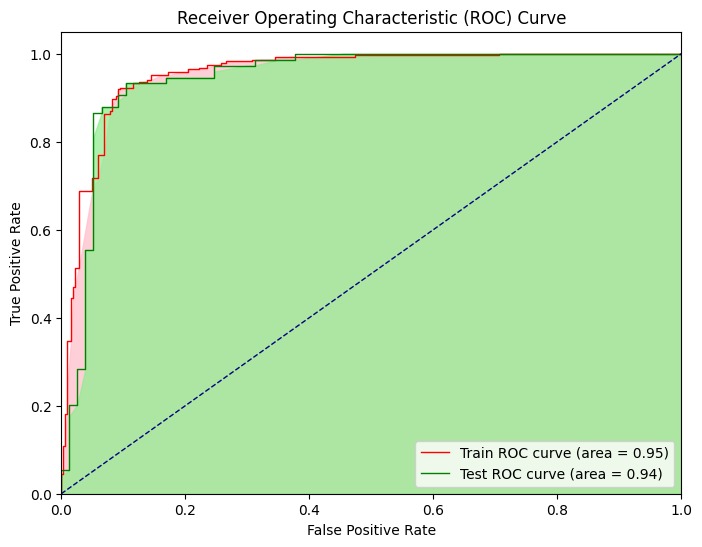

In [659]:
plot_roc_auc(y_test, model.predict_proba(X_test)[:,1], y_train, model.predict_proba(X_train)[:,1])

In [660]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


## получился отличный результат. Классификация на светлые и темные глаза прошла успешно
## теперь будем классифицировать на 4 класса:

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, train_size=0.8, random_state=42)

In [666]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer

## Начнем с логистической регрессии

In [667]:
# Параметры для сетки
lr_params = {
    'estimator__penalty': ['l1', 'l2'],  
    'estimator__C': [0.1, 1, 10]
}
 
lr_model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))    
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Лучшая модель
best_model = lr_grid.best_estimator_

# Вывод результатов
print("Лучшие параметры для DecisionTreeClassifier:", lr_grid.best_params_)
print("Лучшая точность на валидационной выборке:", lr_grid.best_score_)

Лучшие параметры для DecisionTreeClassifier: {'estimator__C': 10, 'estimator__penalty': 'l1'}
Лучшая точность на валидационной выборке: 0.6843388429752066


In [668]:
## проще один раз функцию написать конечно:
def acc(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
acc(best_model)

Accuracy: 0.73


## кастомная функцию для отрисовки roc_auc one versus all для мультиклассовой классификации

In [704]:
from sklearn.preprocessing import label_binarize

def plot_roc_auc_multiclass(y_test_true, y_test_pred_probs, classes):
    """
    Рисует ROC-AUC кривые для многоклассовой классификации.

    Параметры:
     - y_test_true: Настоящие метки классов для данных тестирования.
     - y_test_pred_probs: Предсказанные вероятности принадлежности к каждому классу для данных тестирования.
     - num_classes: Количество классов в задаче классификации.
    """
    # Бинаризация меток классов
    y_test_bin = label_binarize(y_test_true, classes=range(num_classes))
    
    plt.figure(figsize=(8, 6))
    class_labels = ['Blue eyes','Brown eyes','Green eyes','Hazel eyes']
    # Проход по каждому классу
    for i in range(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        
        plt.step(fpr, tpr, lw=1.5, label=f'{class_labels[i]} (area = {roc_auc:0.2f})') 
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
    plt.legend(loc="lower right")
    plt.show()

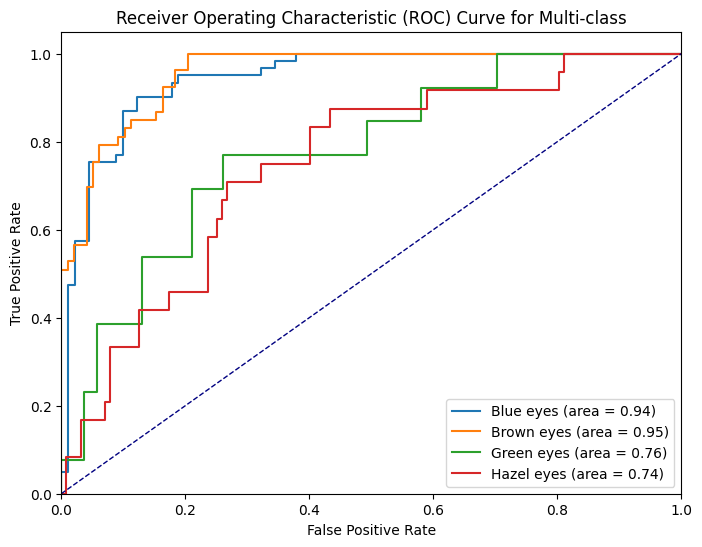

In [705]:
num_classes = 4  
y_test_pred_probs = best_model.predict_proba(X_test)  
plot_roc_auc_multiclass(y_test, y_test_pred_probs, num_classes)

## Теперь дерево решений

In [679]:
# Параметры для сетки
dt_params = {
    'estimator__max_depth': [None, 5, 10, 15],  # Глубина дерева
    'estimator__min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разделения
}

# Модель дерева решений
dt_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))    
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Лучшая модель
best_dt_model = dt_grid.best_estimator_

# Вывод результатов
print("Лучшие параметры для DecisionTreeClassifier:", dt_grid.best_params_)
print("Лучшая точность на валидационной выборке:", dt_grid.best_score_)

Лучшие параметры для DecisionTreeClassifier: {'estimator__max_depth': 5, 'estimator__min_samples_split': 10}
Лучшая точность на валидационной выборке: 0.6760468319559229


In [680]:
acc(best_dt_model)

Accuracy: 0.72


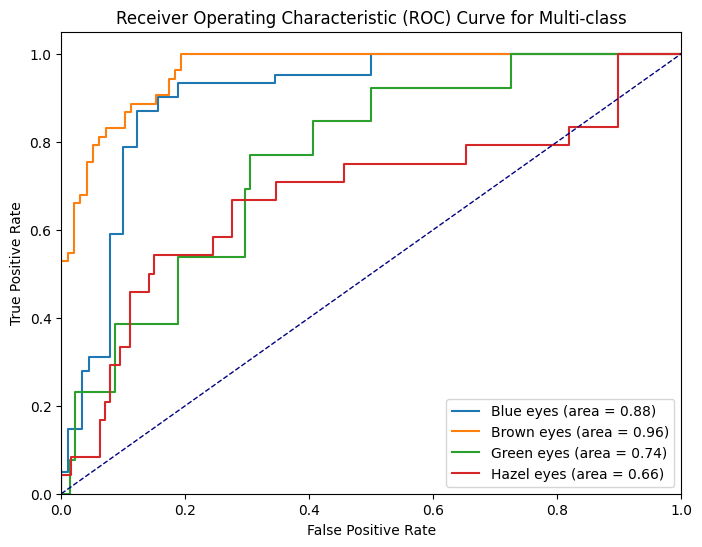

In [706]:
y_test_pred_probs = best_dt_model.predict_proba(X_test)  
plot_roc_auc_multiclass(y_test, y_test_pred_probs, num_classes)

## теперь случайный лес

In [687]:
# Параметры для сетки
rf_params = {
    'estimator__n_estimators': [25, 50, 100, 200],  # Количество деревьев
    'estimator__max_depth': [10, 30, 50, 100, 500]   # Максимальная глубина дерева
}

# Модель случайного леса
rf_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))    
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Лучшая модель
best_rf_model = rf_grid.best_estimator_

# Вывод результатов
print("Лучшие параметры для RandomForestClassifier:", rf_grid.best_params_)
print("Лучшая точность на валидационной выборке:", rf_grid.best_score_)

Лучшие параметры для RandomForestClassifier: {'estimator__max_depth': 30, 'estimator__n_estimators': 100}
Лучшая точность на валидационной выборке: 0.6727548209366391


In [685]:
acc(best_rf_model)

Accuracy: 0.71


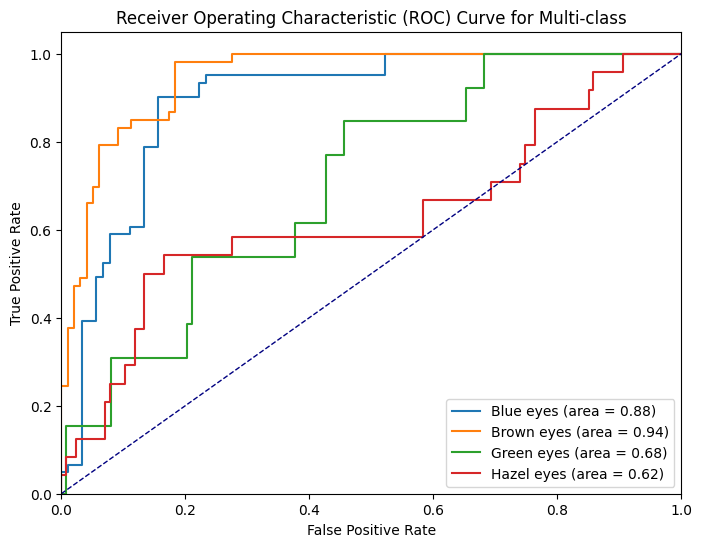

In [707]:
y_test_pred_probs = best_rf_model.predict_proba(X_test)  
plot_roc_auc_multiclass(y_test, y_test_pred_probs, num_classes)

In [708]:
# Параметры для сетки
svm_params = {
    'estimator__C': [0.1, 1, 2, 5, 10],           
    'estimator__kernel': ['poly', 'rbf', 'linear', 'sigmoid']   
}

# Модель SVM
svm_model = OneVsRestClassifier(SVC(probability=True, random_state=42))    
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Лучшая модель
best_svm_model = svm_grid.best_estimator_

# Вывод результатов
print("Лучшие параметры для SVM:", svm_grid.best_params_)
print("Лучшая точность на валидационной выборке:", svm_grid.best_score_)

Лучшие параметры для SVM: {'estimator__C': 1, 'estimator__kernel': 'rbf'}
Лучшая точность на валидационной выборке: 0.6727548209366392


In [709]:
acc(best_svm_model)

Accuracy: 0.74


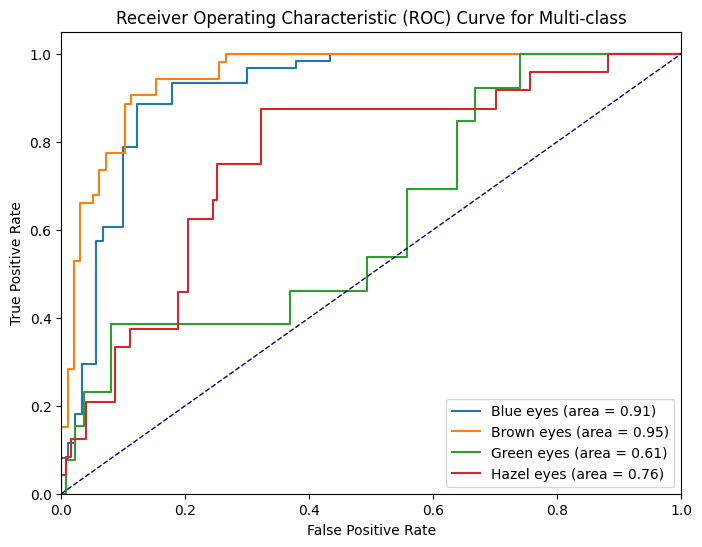

In [710]:
y_test_pred_probs = best_svm_model.predict_proba(X_test)  
plot_roc_auc_multiclass(y_test, y_test_pred_probs, num_classes)

In [711]:
# Параметры для сетки
knn_params = {
    'estimator__n_neighbors': [3, 5, 10],    # Количество соседей
    'estimator__weights': ['uniform', 'distance']  # Метод взвешивания
}

# Модель KNN
knn_model = OneVsRestClassifier(KNeighborsClassifier())    
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Лучшая модель
best_knn_model = knn_grid.best_estimator_
# Вывод результатов
print("Лучшие параметры для SVM:", knn_grid.best_params_)
print("Лучшая точность на валидационной выборке:", knn_grid.best_score_)

Лучшие параметры для SVM: {'estimator__n_neighbors': 10, 'estimator__weights': 'uniform'}
Лучшая точность на валидационной выборке: 0.6529476584022038


In [712]:
acc(best_knn_model)

Accuracy: 0.75


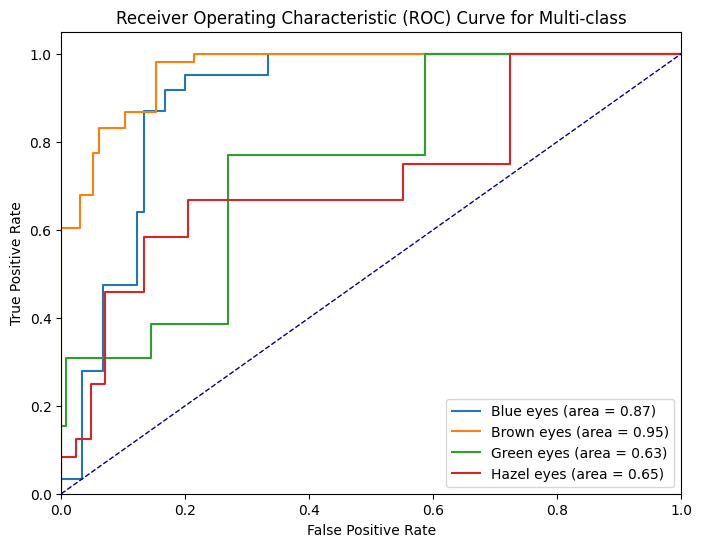

In [713]:
y_test_pred_probs = best_knn_model.predict_proba(X_test)  
plot_roc_auc_multiclass(y_test, y_test_pred_probs, num_classes)

## KNN лучше всех справился, удивительно

In [714]:
X

,0,1,2,3,4,5
user10012,CG,CC,GG,GT,CC,AA
user10074,GG,CT,GG,GG,CC,GG
user10077,GG,CT,GG,GT,CC,GG
user10080,GG,CT,AG,TT,CC,GG
user1010,CG,CC,GG,GG,CC,AG
...,...,...,...,...,...,...
user9876,GG,TT,GG,GT,CC,GG
user9892,GG,CT,GG,GG,CC,AG
user9920,GG,CC,GG,GG,CC,GG
user9928,GG,TT,GG,TT,CC,GG


In [715]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X, y, train_size=0.8, random_state=42)

In [716]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=750, learning_rate=0.01, depth=4, loss_function='MultiClass', random_state=42)
cb.fit(X_train_cb, y_train_cb, cat_features=cat_cols)

0:	learn: 1.3764167	total: 60.4ms	remaining: 45.3s
1:	learn: 1.3667790	total: 66.5ms	remaining: 24.9s
2:	learn: 1.3574943	total: 71.6ms	remaining: 17.8s
3:	learn: 1.3485111	total: 76.7ms	remaining: 14.3s
4:	learn: 1.3396850	total: 81.1ms	remaining: 12.1s
5:	learn: 1.3313213	total: 85ms	remaining: 10.5s
6:	learn: 1.3227258	total: 90.1ms	remaining: 9.56s
7:	learn: 1.3143990	total: 93.7ms	remaining: 8.69s
8:	learn: 1.3065338	total: 97.5ms	remaining: 8.03s
9:	learn: 1.2986370	total: 101ms	remaining: 7.44s
10:	learn: 1.2913031	total: 103ms	remaining: 6.92s
11:	learn: 1.2838532	total: 106ms	remaining: 6.51s
12:	learn: 1.2766168	total: 109ms	remaining: 6.16s
13:	learn: 1.2694194	total: 113ms	remaining: 5.93s
14:	learn: 1.2626586	total: 115ms	remaining: 5.62s
15:	learn: 1.2561698	total: 117ms	remaining: 5.36s
16:	learn: 1.2500376	total: 122ms	remaining: 5.24s
17:	learn: 1.2435873	total: 127ms	remaining: 5.17s
18:	learn: 1.2370772	total: 130ms	remaining: 5.02s
19:	learn: 1.2311173	total: 133ms	

In [719]:
y_pred_cb = cb.predict(X_test_cb)
  
accuracy = accuracy_score(y_test_cb, y_pred_cb)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


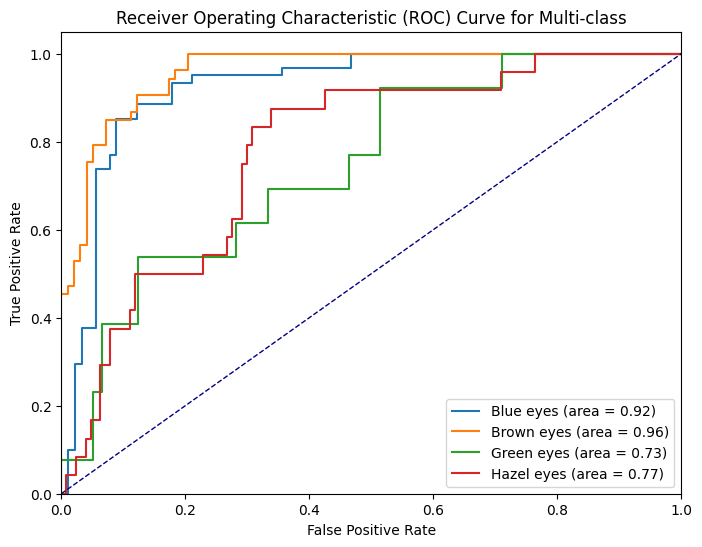

In [720]:
y_pred_cb = cb.predict_proba(X_test_cb)
plot_roc_auc_multiclass(y_test_cb, y_pred_cb, num_classes) 

## И catboost хуже справился